# Предобработка данных

#### Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

UPD_organisations_rating = pd.read_csv('UPD_organisations_rating.csv')
UPD_organisations_rating.head(5)

,user_id,org_id,rating,ts,user_city,org_city,average_bill,rating_org,rubrics,food_delivery,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
0,16998268288908323644,7184895086928047809,2.0,105,msk,msk,500.0,4.038688,Быстрое питание,1,...,0,0,0,0,0,0,0,0,0,0
1,12147440994693609441,7184895086928047809,1.0,1072,msk,msk,500.0,4.038688,Быстрое питание,1,...,0,0,0,0,0,0,0,0,0,0
2,10182924528690880798,7184895086928047809,2.0,420,msk,msk,500.0,4.038688,Быстрое питание,1,...,0,0,0,0,0,0,0,0,0,0
3,3333318221433111575,7184895086928047809,3.0,643,msk,msk,500.0,4.038688,Быстрое питание,1,...,0,0,0,0,0,0,0,0,0,0
4,6208487353916435376,7184895086928047809,5.0,701,msk,msk,500.0,4.038688,Быстрое питание,1,...,0,0,0,0,0,0,0,0,0,0


#### Замена типов данных

In [ ]:
UPD_organisations_rating.dtypes
UPD_organisations_rating['user_id']=UPD_organisations_rating['user_id'].astype('object')
UPD_organisations_rating['org_id']=UPD_organisations_rating['org_id'].astype('object')
UPD_organisations_rating['user_city']=UPD_organisations_rating['user_city'].astype('category')
UPD_organisations_rating['org_city']=UPD_organisations_rating['org_city'].astype('category')
UPD_organisations_rating['rubrics']=UPD_organisations_rating['rubrics'].astype('category')
UPD_organisations_rating.dtypes.head(20)

user_id                     object
org_id                      object
rating                     float64
ts                           int64
user_city                 category
org_city                  category
average_bill               float64
rating_org                 float64
rubrics                   category
food_delivery                int64
breakfast                    int64
takeaway                     int64
summer_terrace               int64
wi_fi                        int64
business_lunch               int64
payment_by_credit_card       int64
coffee_to_go                 int64
closed_for_quarantine        int64
online_takeaway              int64
karaoke                      int64
dtype: object

Cписок колонок

In [ ]:
UPD_organisations_rating.columns

Index(['user_id', 'org_id', 'rating', 'ts', 'user_city', 'org_city',
       'average_bill', 'rating_org', 'rubrics', 'food_delivery', 'breakfast',
       'takeaway', 'summer_terrace', 'wi_fi', 'business_lunch',
       'payment_by_credit_card', 'coffee_to_go', 'closed_for_quarantine',
       'online_takeaway', 'karaoke', 'special_menu', 'sports_broadcasts',
       'food_court1', 'craft_beer', 'projector', 'gift_certificate',
       'wheelchair_access', 'automatic_door', 'food_product_delivery',
       'car_park', 'parking_disabled', 'toilet_for_disabled', 'promotions',
       'cafe', 'minimum_order', 'free_delivery', 'self_service_kiosks',
       'has_restaurant', 'air_conditioning', 'pets', 'elevator', 'has_bar',
       'internet access', 'privilege_tickets', 'organic_food', 'vip_zone',
       'hall_capacity', 'face_control', 'show_program', 'music', 'chillout',
       'dancefloor', 'dress_code', 'billiards', 'strip',
       'elevator_wheelchair_accessible', 'ramp', 'around_the_clock_w

In [ ]:
UPD_organisations_rating.groupby(['payment_by_credit_card', 'accepted_credit_cards'])['org_id'].count()

payment_by_credit_card  accepted_credit_cards
0                       0                        11208
1                       0                        92968
                        1                          102
Name: org_id, dtype: int64

Удаляем лишние, сомнительные переменные. accepted_credit_cards - бесполезная переменная, тк встречается всего 100 раз на 100 тыс.
Некоторые категории, которые выкачались с Яндекс карт: cafe, restaurant - тоже не нужны, тк у нас уже есть rubrics

In [ ]:
UPD_organisations_rating.drop('accepted_credit_cards', inplace=True, axis=1)
UPD_organisations_rating.drop('rating_org', inplace=True, axis=1)
UPD_organisations_rating.drop('cafe', inplace=True, axis=1)
UPD_organisations_rating.drop('has_restaurant', inplace=True, axis=1)

In [ ]:
UPD_organisations_rating.columns

Index(['user_id', 'org_id', 'rating', 'ts', 'user_city', 'org_city',
       'average_bill', 'rubrics', 'food_delivery', 'breakfast', 'takeaway',
       'summer_terrace', 'wi_fi', 'business_lunch', 'payment_by_credit_card',
       'coffee_to_go', 'closed_for_quarantine', 'online_takeaway', 'karaoke',
       'special_menu', 'sports_broadcasts', 'food_court1', 'craft_beer',
       'projector', 'gift_certificate', 'wheelchair_access', 'automatic_door',
       'food_product_delivery', 'car_park', 'parking_disabled',
       'toilet_for_disabled', 'promotions', 'minimum_order', 'free_delivery',
       'self_service_kiosks', 'air_conditioning', 'pets', 'elevator',
       'has_bar', 'internet access', 'privilege_tickets', 'organic_food',
       'vip_zone', 'hall_capacity', 'face_control', 'show_program', 'music',
       'chillout', 'dancefloor', 'dress_code', 'billiards', 'strip',
       'elevator_wheelchair_accessible', 'ramp', 'around_the_clock_work1',
       'pickup', 'farm_products', 'deliv

Переменные, которые наиболее коррелируют с рейтингом (по модулю)

In [ ]:
abs(UPD_organisations_rating.corr()['rating'].sort_values(ascending=False)).sort_values(ascending=False).iloc[1:21]

toilet_for_disabled       0.040341
payment_by_credit_card    0.038589
parking_disabled          0.038471
craft_beer                0.038304
gift_certificate          0.037089
automatic_door            0.036600
wheelchair_access         0.035434
sports_broadcasts         0.028462
projector                 0.027374
food_delivery             0.026846
average_bill              0.023697
karaoke                   0.023152
privilege_tickets         0.023034
self_service_kiosks       0.022776
free_delivery             0.021567
music                     0.021286
car_park                  0.020704
face_control              0.019594
wi_fi                     0.019235
vip_zone                  0.018640
Name: rating, dtype: float64

Поиск и замена пустых значений

In [ ]:
UPD_organisations_rating.shape

(104278, 68)

In [ ]:
UPD_organisations_rating.isnull().sum().sort_values(ascending=False)

average_bill           41278
user_id                    0
hall_capacity              0
dress_code                 0
dancefloor                 0
                       ...  
parking_disabled           0
toilet_for_disabled        0
promotions                 0
minimum_order              0
handmade_goods             0
Length: 68, dtype: int64

В столбце average_bill 41 тыс пропущенных значений из 104 тыс. Поэтому удаляем строки с пропущенными значения из датасета. По другим столбцам пропусков нет

In [ ]:
UPD_organisations_rating = UPD_organisations_rating[UPD_organisations_rating['average_bill'].notnull()]
UPD_organisations_rating.shape

(63000, 68)

Поиск дубликатов, удаление

In [ ]:
UPD_organisations_rating.duplicated().sum() 

31

Удаляем 31 строку дубликатов

In [ ]:
UPD_organisations_rating.duplicated().sum() 
UPD_organisations_rating[UPD_organisations_rating.duplicated(keep=False)] # keep=False чтобы увидеть все задублированные
UPD_organisations_rating.drop_duplicates(inplace=True)
UPD_organisations_rating.shape

(62969, 68)

Поиск выбросов, удаление

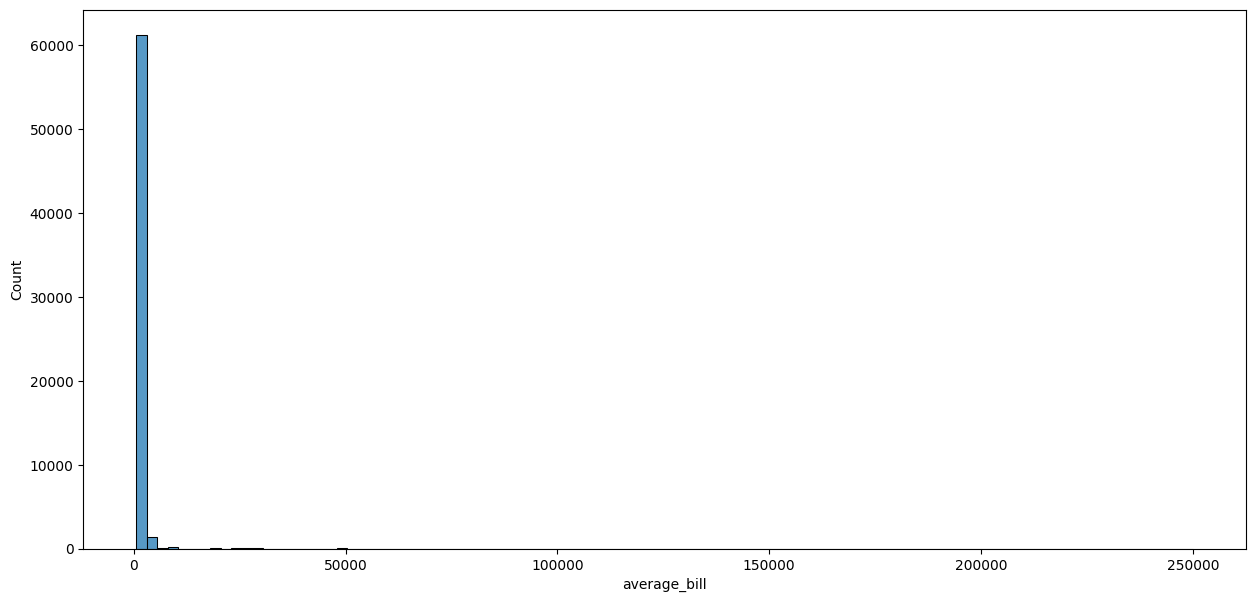

In [ ]:
fig = plt.figure(figsize=(15, 7))
sns.histplot(data=UPD_organisations_rating, x='average_bill', bins = 100)
plt.show()

In [ ]:
UPD_organisations_rating[UPD_organisations_rating['average_bill']>10000].shape

(155, 68)

Удалим 155 наблюдений со средним чеком >10000, тк они являются выбросами

Логарифмируем средний чек ('average_bill_log'), чтобы избежать неравномерности в данных

In [ ]:
UPD_organisations_rating.shape

(62969, 68)

In [ ]:
UPD_organisations_rating['karaoke'], sum(UPD_organisations_rating['karaoke'])

(0         0
 1         0
 2         0
 3         0
 4         0
          ..
 104250    0
 104260    0
 104270    0
 104273    0
 104276    1
 Name: karaoke, Length: 62969, dtype: int64,
 34846)

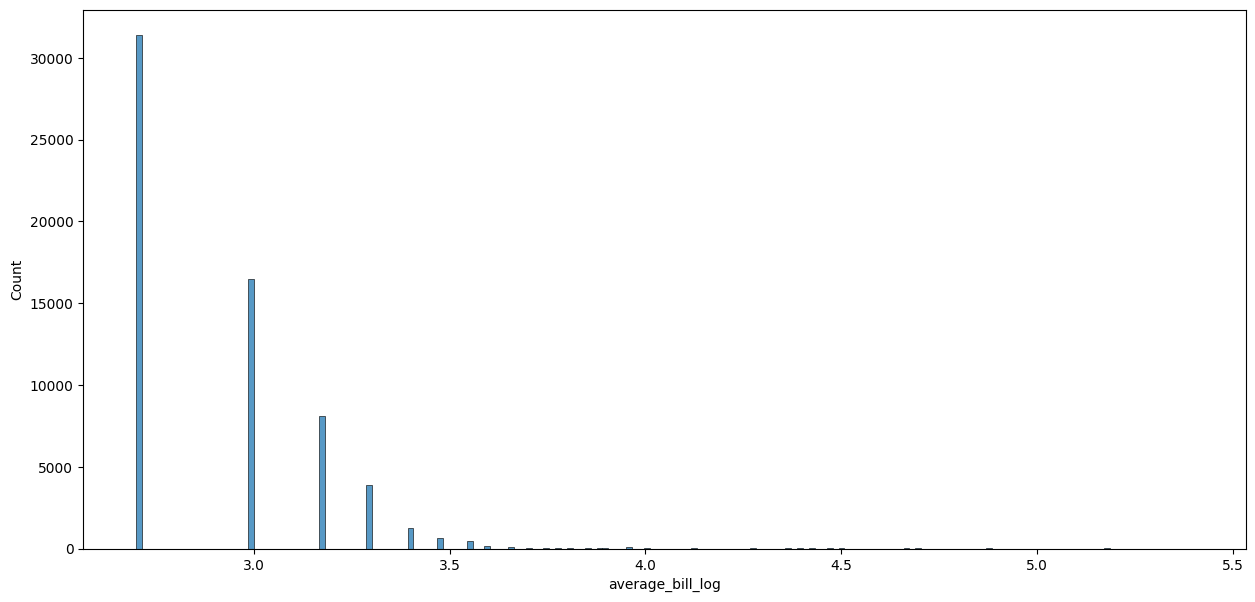

In [ ]:
UPD_organisations_rating.insert(7, 'average_bill_log', np.log10(UPD_organisations_rating['average_bill']))

fig = plt.figure(figsize=(15, 7))
sns.histplot(data=UPD_organisations_rating, x='average_bill_log')
plt.show()

In [ ]:
UPD_organisations_rating.groupby(UPD_organisations_rating.rubrics)['karaoke'].apply(sum).sort_values()

rubrics
Бар безалкогольных напитков        2
Кофе с собой                       2
Спортбар                         181
Столовая                         189
Булочная, пекарня                214
Кондитерская                     503
Кальян-бар                       547
Кофейня                          619
Пиццерия                         870
Суши-бар                         871
Быстрое питание                  904
Бар, паб                        5069
Кафе                            8021
Ресторан                       16854
Name: karaoke, dtype: int64

Включим в анализ только места, где караоке действительно часто бывают - рестораны, кафе и бары/пабы

In [ ]:
UPD_organisations_rating = UPD_organisations_rating[(UPD_organisations_rating.rubrics=='Ресторан')|(UPD_organisations_rating.rubrics=='Кафе')|(UPD_organisations_rating.rubrics=='Бар, паб')]

In [ ]:
UPD_organisations_rating

# !pip install openpyxl
# UPD_organisations_rating.to_excel('UPD_organisations_rating.xlsx')

,user_id,org_id,rating,ts,user_city,org_city,average_bill,average_bill_log,rubrics,food_delivery,...,coffee_shop,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,kalyan,teahouse,bread_from_tandoor,handmade_goods
14,17831623955922237170,17298320470833172098,5.0,196,msk,msk,500.0,2.69897,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
15,9376885319913260032,17298320470833172098,5.0,40,msk,msk,500.0,2.69897,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
16,177902855161420442,17298320470833172098,4.0,962,msk,msk,500.0,2.69897,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
17,3302161189676549634,17298320470833172098,5.0,531,msk,msk,500.0,2.69897,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
18,6839266467730918076,17298320470833172098,5.0,76,msk,msk,500.0,2.69897,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104249,18080670751989459314,16389319930802966171,5.0,490,msk,msk,500.0,2.69897,Ресторан,0,...,0,0,0,0,0,0,0,0,0,0
104250,8991457401971022501,8123696966366210621,1.0,647,msk,msk,500.0,2.69897,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
104270,10303950645451659605,2009927720841218679,1.0,792,spb,spb,500.0,2.69897,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
104273,15294955784899173947,14098598077744238961,5.0,360,msk,msk,500.0,2.69897,"Бар, паб",1,...,0,0,0,0,0,0,0,0,0,0
